https://www.tensorflow.org/tutorials/images/segmentation?hl=it

https://keras.io/examples/vision/oxford_pets_image_segmentation/

https://medium.com/geekculture/u-net-implementation-from-scratch-using-tensorflow-b4342266e406

https://towardsdatascience.com/medical-image-segmentation-part-1-unet-convolutional-networks-with-interactive-code-70f0f17f46c6

https://github.com/VidushiBhatia/U-Net-Implementation/blob/main/U_Net_for_Image_Segmentation_From_Scratch_Using_TensorFlow_v4.ipynb

https://www.tensorflow.org/tutorials/images/segmentation?hl=it

https://keras.io/examples/vision/oxford_pets_image_segmentation/

https://www.kaggle.com/code/ahmedelmoataz/handling-the-dataset-for-cbis-ddsm-mass

https://www.kaggle.com/code/katepereira/breast-cancer-detection

https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset?select=csv

https://www.kaggle.com/code/nitinsss/image-classification-with-cnn

https://arxiv.org/ftp/arxiv/papers/2203/2203.08812.pdf

file:///C:/Users/victo/Downloads/information-14-00410-v2.pdf

https://www.learndatasci.com/tutorials/convolutional-neural-networks-image-classification/
https://towardsdatascience.com/medical-x-ray-%EF%B8%8F-image-classification-using-convolutional-neural-network-9a6d33b1c2a

In [1]:
import pandas as pd 
import numpy as np 
import cv2
import PIL
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)

import cv2
import time
import tensorflow as tf 

from keras.models import Model, load_model, Sequential
from keras.layers import Input
from keras.layers import Dropout, Lambda
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D
from keras.layers import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from concurrent.futures import ThreadPoolExecutor
import tensorflow as tf

# Getting all the dataset locations

In [2]:
dicom_data = pd.read_csv('dicom_info.csv')
dicom_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [3]:
dicom_data.shape

(10237, 38)

In [4]:
image_dir = 'jpeg' #cartella che contiene le immagini

# 

In [5]:
# get paths of all mammogram images
full_mammogram_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [6]:
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images[1] #change the name

'jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg'

In [7]:
# 'full_mammogram_images' is a list of file paths to image files

# Create a figure and axis for the grid layout
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the first 16 files (4x4 grid)
for i, file in enumerate(full_mammogram_images.iloc[0:16]):
    # Open the image using PIL
    cropped_images_show = PIL.Image.open(file)
    
    # Convert the image to grayscale
    gray_img = cropped_images_show.convert("L")
    
    # Calculate the row and column index for the current subplot
    row = i // 4
    col = i % 4
    
    # Display the grayscale image in the appropriate subplot
    axes[row, col].imshow(gray_img, cmap='gray')
    axes[row, col].axis('off')  # Turn off axis labels
    
# Adjust layout
plt.tight_layout()
plt.show()


In [8]:
# Create dictionaries to store image paths using keys extracted from the paths
full_mammogram_dict = dict()

# Populate the full_mammogram_dict dictionary
for dicom in full_mammogram_images:
    key = dicom.split("/")[1]  # Extract the key from the path
    full_mammogram_dict[key] = dicom

# Retrieve and print the first item (key-value pair) from the full_mammogram_dict dictionary
first_item = next(iter(full_mammogram_dict.items()))
print(first_item)

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849', 'jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')


# 

In [9]:
cropped_images=dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [10]:
# 'cropped_images' is a list of file paths to image files
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images.head()
'''Cropping an image involves selecting a rectangular or non-rectangular region of interest (ROI) 
from the original image, discarding the rest of the content.'''

'Cropping an image involves selecting a rectangular or non-rectangular region of interest (ROI) \nfrom the original image, discarding the rest of the content.'

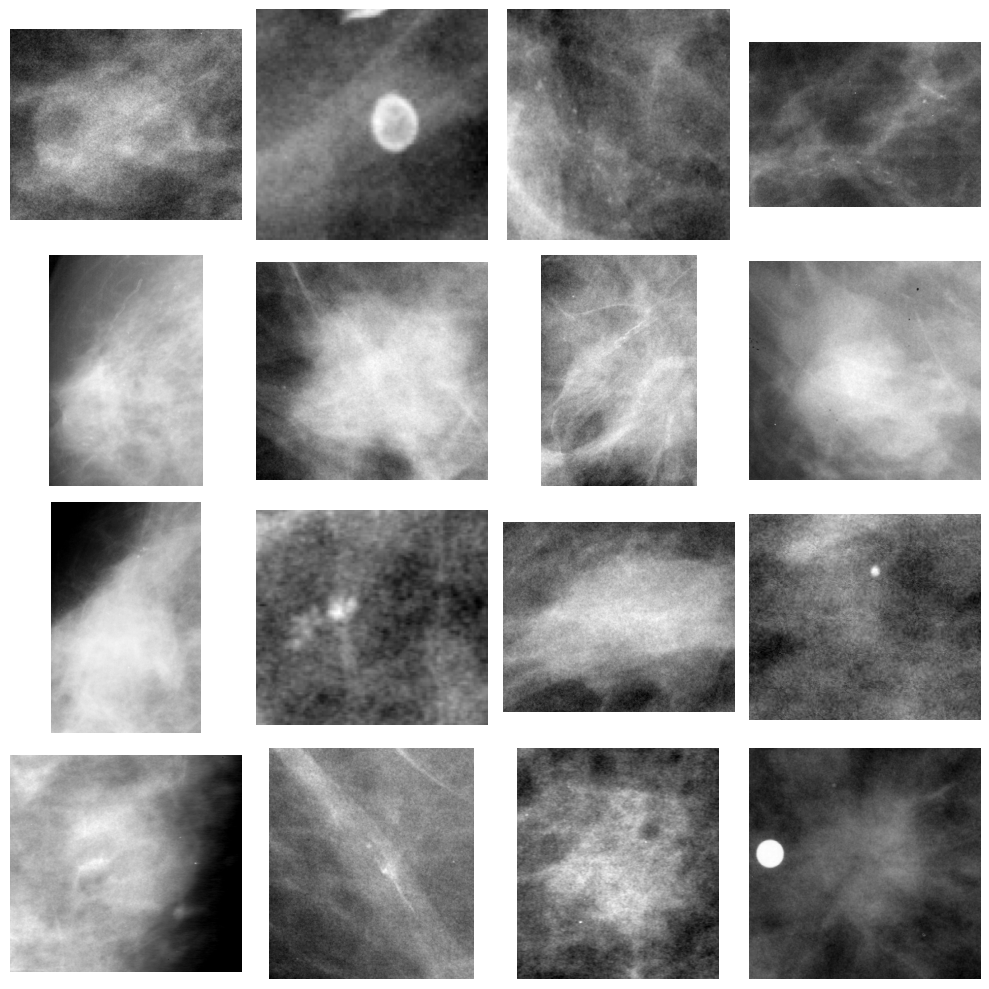

In [11]:
# 'cropped_images' is a list of file paths to image files
'''Region of Interest (ROI) Selection: In some cases, you might be interested 
in a specific region of an image that contains the most relevant information.
For example, in object detection or image classification tasks, you might crop 
the image to focus only on the object of interest.'''

# Create a figure and axis for the grid layout
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the first 16 files (4x4 grid)
for i, file in enumerate(cropped_images.iloc[0:16]):
    # Open the image using PIL
    cropped_images_show = PIL.Image.open(file)
    
    # Convert the image to grayscale
    gray_img = cropped_images_show.convert("L")
    
    # Calculate the row and column index for the current subplot
    row = i // 4
    col = i % 4
    
    # Display the grayscale image in the appropriate subplot
    axes[row, col].imshow(gray_img, cmap='gray')
    axes[row, col].axis('off')  # Turn off axis labels
    
# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
# Create dictionaries to store image paths using keys extracted from the paths
cropped_dict = dict()

# Populate the cropped_dict dictionary
for dicom in cropped_images:
    key = dicom.split("/")[1]  # Extract the key from the path
    cropped_dict[key] = dicom
    
# Retrieve and print the first item (key-value pair) from the full_mammogram_dict dictionary
first_item = next(iter(cropped_dict.items()))
print(first_item)

('1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304', 'jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg')


# 

In [13]:
ROI_mask_images=dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [14]:
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask_images.head()

5     jpeg/1.3.6.1.4.1.9590.100.1.2.1533390529131213...
8     jpeg/1.3.6.1.4.1.9590.100.1.2.1789947146114851...
9     jpeg/1.3.6.1.4.1.9590.100.1.2.4118334926123736...
14    jpeg/1.3.6.1.4.1.9590.100.1.2.2363735487129941...
20    jpeg/1.3.6.1.4.1.9590.100.1.2.3570080504125347...
Name: image_path, dtype: object

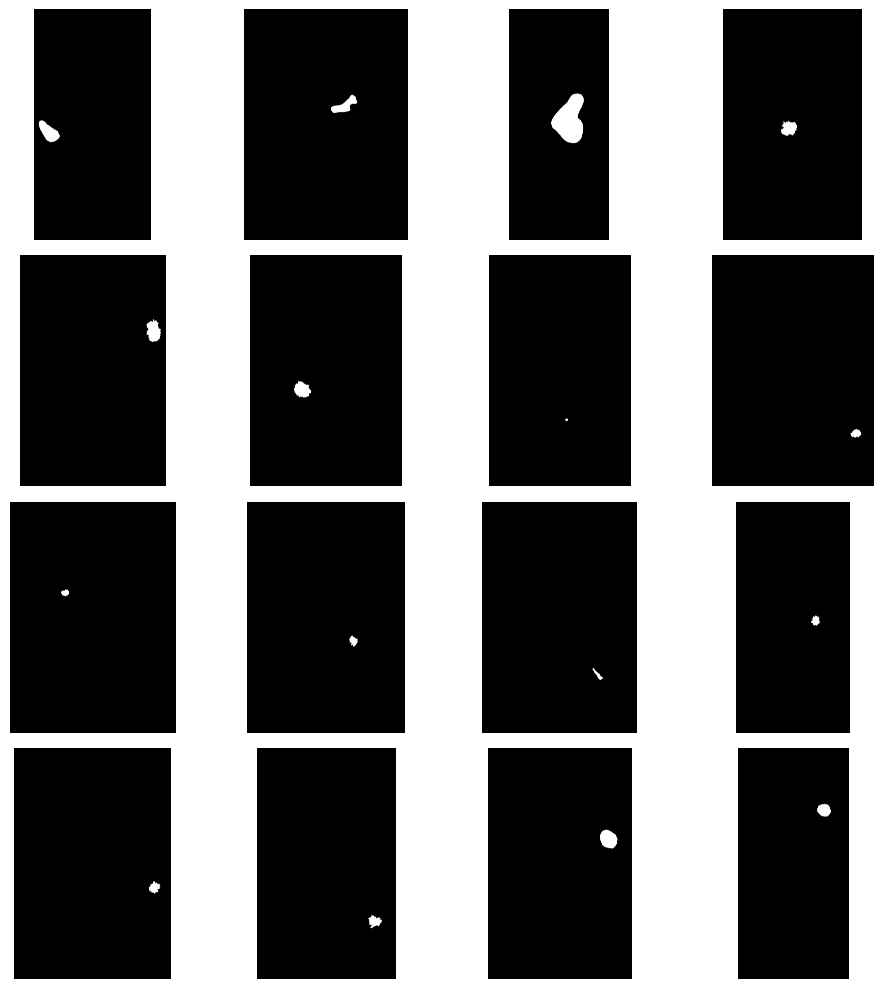

In [15]:
# 'ROI_mask_images' is a list of file paths to image files

# Create a figure and axis for the grid layout
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the first 16 files (4x4 grid)
for i, file in enumerate(ROI_mask_images.iloc[0:16]):
    # Open the image using PIL
    cropped_images_show = PIL.Image.open(file)
    
    # Convert the image to grayscale
    gray_img = cropped_images_show.convert("L")
    
    # Calculate the row and column index for the current subplot
    row = i // 4
    col = i % 4
    
    # Display the grayscale image in the appropriate subplot
    axes[row, col].imshow(gray_img, cmap='gray')
    axes[row, col].axis('off')  # Turn off axis labels
    
# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
# Create dictionaries to store image paths using keys extracted from the paths
roi_mask_dict = dict()

# Populate the roi_mask_dict dictionary
for dicom in ROI_mask_images:
    key = dicom.split("/")[1]  # Extract the key from the path
    roi_mask_dict[key] = dicom

# Retrieve and print the first item (key-value pair) from the full_mammogram_dict dictionary
first_item = next(iter(roi_mask_dict.items()))
print(first_item)

('1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138', 'jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg')


# 

# Getting all the Mass dataset

In [17]:
mass_train_data = pd.read_csv('mass_case_description_train_set.csv')
mass_test_data = pd.read_csv('mass_case_description_test_set.csv')

In [18]:
mass_train_data.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [19]:
mass_test_data.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT        MLO               1   
2    P_00017               2                 LEFT         CC               1   
3    P_00017               2                 LEFT        MLO               1   
4    P_00032               3                RIGHT         CC               1   

  abnormality type mass shape   mass margins  assessment  pathology  subtlety  \
0             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
1             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
2             mass      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4   
3             mass      ROUND    ILL_DEFINED           4  MALIGNANT         4   
4             mass      ROUND       OBSCURED           0     BENIGN         2   

                                     image file path  \
0  Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...   
1  Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...   
2  Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...   
3  Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...   
4  Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...   

                             cropped image file path  \
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....   
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....   
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....   

                                  ROI mask file path  
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....  
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....

# 

# Edit the impage path in mass dataset from dicom list

In [20]:
def fix_image_path(dataset):
    for i, img in enumerate(dataset.values):
        # Extract image names from the paths in the dataset
        img_name = img[11].split("/")[2]  # Extract image name from column 11
        # Update the corresponding path in the dataset using full_mammogram_dict
        dataset.iloc[i, 11] = full_mammogram_dict[img_name]

        img_name = img[12].split("/")[2]  # Extract image name from column 12
        # Update the corresponding path in the dataset using cropped_dict
        dataset.iloc[i, 12] = cropped_dict[img_name]

        img_name = img[13].split("/")[2]  # Extract image name from column 13
        # Update the corresponding path in the dataset using ROI_mask_dict
        dataset.iloc[i, 13] = roi_mask_dict[img_name]

In [21]:
fix_image_path(mass_train_data)
mass_train_data.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  jpeg/1.3.6.1.4.1.9590.100.1.2.3423861948112676...   
1  jpeg/1.3.6.1.4.1.9590.100.1.2.3593083293123978...   
2  jpeg/1.3.6.1.4.1.9590.100.1.2.8918004621102253...   
3  jpeg/1.3.6.1.4.1.9590.100.1.2.2953609263134927...   
4  jpeg/1.3.6.1.4.1.9590.100.1.2.4105247549130579...   

                             cropped image file path  \
0  jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...   
1  jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...   
2  jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...   
3  jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...   
4  jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...   

                                  ROI mask file path  
0  jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...  
1  jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...  
2  jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...  
3  jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...  
4  jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...

In [22]:
fix_image_path(mass_test_data)
mass_train_data.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  jpeg/1.3.6.1.4.1.9590.100.1.2.3423861948112676...   
1  jpeg/1.3.6.1.4.1.9590.100.1.2.3593083293123978...   
2  jpeg/1.3.6.1.4.1.9590.100.1.2.8918004621102253...   
3  jpeg/1.3.6.1.4.1.9590.100.1.2.2953609263134927...   
4  jpeg/1.3.6.1.4.1.9590.100.1.2.4105247549130579...   

                             cropped image file path  \
0  jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...   
1  jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...   
2  jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...   
3  jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...   
4  jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...   

                                  ROI mask file path  
0  jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...  
1  jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...  
2  jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...  
3  jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...  
4  jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...

In [23]:
# Concatenate the two dataframes
mass_data = pd.DataFrame(pd.concat([mass_train_data, mass_test_data]))

# Display the first few rows of the concatenated dataframe
mass_data

mass_data['ROI mask file path'].to_csv('masks', index=False)

# 

<h2> Prepaid the train/test dataset for mass cancer

In [ ]:
IMG_WIDTH, IMG_HEIGHT = (256, 256)
IMG_CHANNELS = 3

In [ ]:
def load_image(img):
    # img  è il path dove si trova l'immagine e la leggiamo con imread
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    #resize cause a lot of images have different size
    c_img_size = cv2.resize(c_img, (IMG_WIDTH, IMG_HEIGHT), interpolation = cv2.INTER_LINEAR)  
        
    return c_img_size


In [ ]:
def convert_to_grayscale(img):
    # img  è il path dove si trova l'immagine e la leggiamo con imread
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    
    #resize cause a lot of images have different size
    c_img_size = cv2.resize(c_img, (IMG_WIDTH, IMG_HEIGHT), interpolation = cv2.INTER_LINEAR)
    
    # Convert to grayscale
    grayscale_image = cv2.cvtColor(c_img_size, cv2.COLOR_RGB2GRAY)
    
    # Resize to (224, 224)
    resized_image = cv2.resize(grayscale_image, (IMG_WIDTH, IMG_HEIGHT))
    
    # Expand dimensions 
    
    reshaped_image = np.expand_dims(resized_image, axis=-1)
    
    # Apply the conversion
    binary_array = (reshaped_image > 0).astype(np.uint8)  # Convert True to 1, False to 0

    
    return binary_array


In [ ]:
def get_images_result_UNet(dataset):
    with ThreadPoolExecutor() as executor:
        images  = np.array(list(executor.map(load_image, dataset.loc[:]['image file path'])))
        masks  = np.array(list(executor.map(convert_to_grayscale, dataset.loc[:]['ROI mask file path'])))    
    
     # Return a tuple containing images and binary class matrices
    return (images, masks )

In [71]:
from concurrent.futures import ThreadPoolExecutor

# multiple threads reading data
mass_train_data_shuffled = mass_train_data.sample(frac = 1)
mass_test_data_shuffled = mass_test_data.sample(frac = 1)


(X_train, y_train) = get_images_result_UNet(mass_train_data_shuffled)
(X_test, y_test) = get_images_result_UNet(mass_test_data_shuffled)


print('X_train shape : {}' .format(X_train.shape))
print('y_train shape : {}' .format(y_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (1318, 256, 256, 3)
y_train shape : (1318, 256, 256, 1)
X_test shape : (378, 256, 256, 3)
y_test shape : (378, 256, 256, 1)


In [33]:
plt.figure(figsize=(12, 5))
for i, idx in enumerate(np.random.randint(X_train.shape[0], size=18), start=1):
    plt.subplot(3, 6, i)
    plt.imshow( X_train[idx], cmap='gray')

    binary_array = (y_train[idx] > 0).astype(np.uint8)  # Convert True to 1, False to 0
    inverted_array = binary_array
    plt.imshow( np.ones_like(inverted_array)-inverted_array, alpha=0.5, cmap='Set1')
    plt.axis('off')

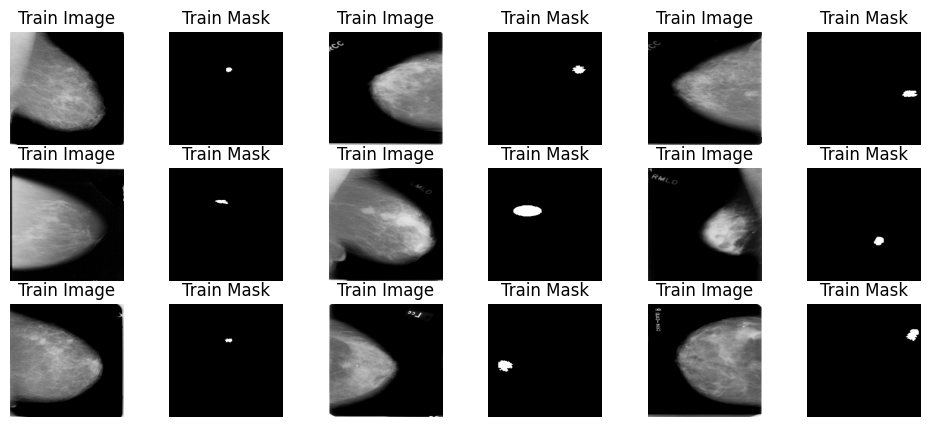

In [34]:
plt.figure(figsize=(12, 5))
i=1
for idx in np.random.randint( X_train.shape[0], size=9):
    plt.subplot(3,6,i);i+=1
    plt.imshow( X_train[idx])
    plt.title("Train Image")
    plt.axis('off')
    plt.subplot(3,6,i);i+=1
    plt.imshow( y_train[idx], cmap='gray')
    plt.title("Train Mask")
    plt.axis('off')
     

# Data Augmentation

In [35]:
def ROTATE_90_CLOCKWISE(image):
    return np.rot90(image, k=1, axes=(0, 1))

In [36]:
def ROTATE_90_COUNTERCLOCKWISE(image):
    return np.rot90(image, k=3, axes=(0, 1))

In [37]:
def ROTATE_180(image):
    return np.rot90(image, k=2, axes=(0, 1))

In [72]:
def ROTATE_90_CLOCKWISE_Unet(X_train, y_train):
    with ThreadPoolExecutor() as executor:
        images = np.array(list(executor.map(ROTATE_90_CLOCKWISE, X_train)))
        masks = np.array(list(executor.map(ROTATE_90_CLOCKWISE, y_train)))
            
     # Return a tuple containing images and binary class matrices
    return (images, masks)

X_R_90, y_R_90 = ROTATE_90_CLOCKWISE_Unet(X_train, y_train)

In [73]:
img = X_R_90[0]
imgmask = y_R_90[0]

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8, 5))
ax[0].imshow(img,  cmap='gray')
ax[0].set_title("180 degrees", size=10)
ax[1].imshow(imgmask,  cmap='gray')
ax[1].set_title("180 degrees mask", size=10)

Text(0.5, 1.0, '180 degrees mask')

In [76]:
def ROTATE_90_COUNTERCLOCKWISE_Unet(X_train, y_train):
    with ThreadPoolExecutor() as executor:
        images = np.array(list(executor.map(ROTATE_90_COUNTERCLOCKWISE, X_train)))
        masks = np.array(list(executor.map(ROTATE_90_COUNTERCLOCKWISE, y_train)))
            
     # Return a tuple containing images and binary class matrices
    return (images, masks)

X_R_90_c, y_R_90_c = ROTATE_90_COUNTERCLOCKWISE_Unet(X_train, y_train)

Text(0.5, 1.0, '180 degrees mask')

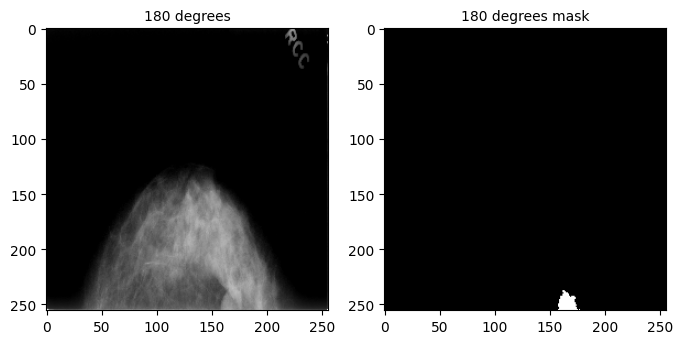

In [77]:
img = X_R_90_c[0]
imgmask = y_R_90_c[0]

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8, 5))
ax[0].imshow(img,  cmap='gray')
ax[0].set_title("180 degrees", size=10)
ax[1].imshow(imgmask,  cmap='gray')
ax[1].set_title("180 degrees mask", size=10)

In [78]:
def ROTATE_180_Unet(X_train, y_train):
    with ThreadPoolExecutor() as executor:
        images = np.array(list(executor.map(ROTATE_180, X_train)))
        masks = np.array(list(executor.map(ROTATE_180, y_train)))
            
     # Return a tuple containing images and binary class matrices
    return (images, masks)

X_R_180, y_R_180 = ROTATE_180_Unet(X_train, y_train)

Text(0.5, 1.0, '180 degrees mask')

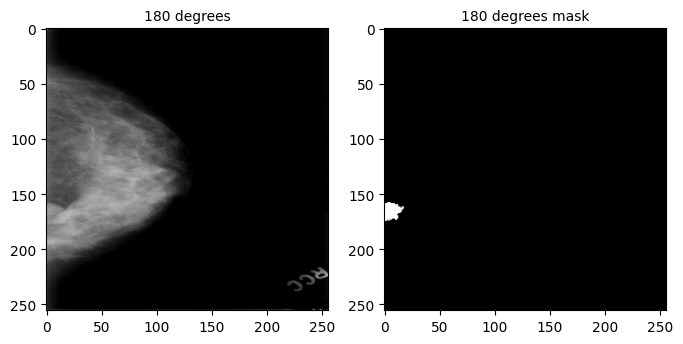

In [79]:
img = X_R_180[0]
imgmask = y_R_180[0]

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8, 5))
ax[0].imshow(img,  cmap='gray')
ax[0].set_title("180 degrees", size=10)
ax[1].imshow(imgmask,  cmap='gray')
ax[1].set_title("180 degrees mask", size=10)

In [80]:

X = np.concatenate((X_train, X_R_90), axis=0)
X = np.concatenate((X, X_R_90_c), axis=0)
X = np.concatenate((X, X_R_180), axis=0)
X_train = X

y = np.concatenate((y_train, y_R_90), axis=0)
y = np.concatenate((y, y_R_90_c), axis=0)
y = np.concatenate((y, y_R_180), axis=0)
y_train = y

In [81]:
from sklearn.model_selection import train_test_split
# Define the split ratio (e.g., 80% train, 20% validation)
split_ratio = 0.8
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1 - split_ratio, random_state=42)

In [82]:
print('X_train shape : {}' .format(X_train.shape))
print('y_train shape : {}' .format(y_train.shape))
print('X_val shape : {}' .format(X_val.shape))
print('y_val shape : {}' .format(y_val.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (4217, 256, 256, 3)
y_train shape : (4217, 256, 256, 1)
X_val shape : (1055, 256, 256, 3)
y_val shape : (1055, 256, 256, 1)
X_test shape : (378, 256, 256, 3)
y_test shape : (378, 256, 256, 1)


# 

<h2>  Constructing the U-Net Architecture

In [48]:
from keras.optimizers import Adam  # Import Adam optimizer
from tensorflow.keras.metrics import MeanIoU

# Compile the model with the IoU metric
iou_metric = MeanIoU(num_classes=2)  # num_classes should be the number of classes in your segmentation task

In [47]:
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])

model.compile(optimizer='adam'), loss='binary_crossentropy', metrics=['accuracy', iou_metric])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                              

 conv2d_15 (Conv2D)          (None, 128, 128, 32)         9248      ['dropout_7[0][0]']           
                                                                                                  
 conv2d_transpose_3 (Conv2D  (None, 256, 256, 16)         2064      ['conv2d_15[0][0]']           
 Transpose)                                                                                       
                                                                                                  
 concatenate_3 (Concatenate  (None, 256, 256, 32)         0         ['conv2d_transpose_3[0][0]',  
 )                                                                   'conv2d_1[0][0]']            
                                                                                                  
 conv2d_16 (Conv2D)          (None, 256, 256, 16)         4624      ['concatenate_3[0][0]']       
                                                                                                  
 dropout_8

In [49]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model

filepath = "model.h5"

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

                              
earlystopper = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode = 'min')

callbacks_list = [checkpoint, earlystopper]

history = model.fit(X_train, y_train, validation_data = [X_val, y_val], batch_size=16, epochs=50, 
                    callbacks=callbacks_list)




Epoch 1/50
297/297 [==============================] - ETA: 0s - loss: 0.0338 - accuracy: 0.9930 - mean_io_u: 0.4973
Epoch 1: val_loss improved from inf to 0.02407, saving model to model.h5
297/297 [==============================] - 1362s 5s/step - loss: 0.0338 - accuracy: 0.9930 - mean_io_u: 0.4973 - val_loss: 0.0241 - val_accuracy: 0.9947 - val_mean_io_u: 0.4973
Epoch 2/50


C:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


297/297 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9946 - mean_io_u: 0.4973
Epoch 2: val_loss improved from 0.02407 to 0.01973, saving model to model.h5
297/297 [==============================] - 1349s 5s/step - loss: 0.0227 - accuracy: 0.9946 - mean_io_u: 0.4973 - val_loss: 0.0197 - val_accuracy: 0.9947 - val_mean_io_u: 0.4973
Epoch 3/50
297/297 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 0.9946 - mean_io_u: 0.4973
Epoch 3: val_loss improved from 0.01973 to 0.01924, saving model to model.h5
297/297 [==============================] - 1351s 5s/step - loss: 0.0205 - accuracy: 0.9946 - mean_io_u: 0.4973 - val_loss: 0.0192 - val_accuracy: 0.9948 - val_mean_io_u: 0.4973
Epoch 4/50
297/297 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9946 - mean_io_u: 0.4973
Epoch 4: val_loss improved from 0.01924 to 0.01895, saving model to model.h5
297/297 [==============================] - 1349s 5s/step - loss: 0.0196 - accu

In [50]:
# Specify the path where you want to save the model
model.save('saved_models/UNet.hdf')

INFO:tensorflow:Assets written to: saved_models/UNet.hdf\assets


INFO:tensorflow:Assets written to: saved_models/UNet.hdf\assets


# Plot Loss & Accuracy

In [56]:
hist = history
print(history.history.keys())

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
t = f.suptitle('Unet Performance in Segmenting Tumors', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = hist.epoch

ax1.plot(epoch_list, hist.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, hist.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epoch_list[-1], 5))
ax1.set_ylabel('Accuracy Value');ax1.set_xlabel('Epoch');ax1.set_title('Accuracy')
ax1.legend(loc="best");ax1.grid(color='gray', linestyle='-', linewidth=0.5)

ax2.plot(epoch_list, hist.history['loss'], label='Train Loss')
ax2.plot(epoch_list, hist.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epoch_list[-1], 5))
ax2.set_ylabel('Loss Value');ax2.set_xlabel('Epoch');ax2.set_title('Loss')
ax2.legend(loc="best");ax2.grid(color='gray', linestyle='-', linewidth=0.5)

ax3.plot(epoch_list, hist.history['mean_io_u'], label='Train IOU metric')
ax3.plot(epoch_list, hist.history['val_mean_io_u'], label='Validation IOU metric')
ax3.set_xticks(np.arange(0, epoch_list[-1], 5))
ax3.set_ylabel('IOU metric');ax3.set_xlabel('Epoch');ax3.set_title('IOU metric')
ax3.legend(loc="best");ax3.grid(color='gray', linestyle='-', linewidth=0.5)

dict_keys(['loss', 'accuracy', 'mean_io_u', 'val_loss', 'val_accuracy', 'val_mean_io_u'])


# RESULT

In [86]:
model = load_model('saved_models/UNet_original.hdf') 

In [89]:
# Evaluate the model on the test dataset
train_loss, train_accuracy, mean_iou = model.evaluate(X_test, y_test, verbose=1)

# Print the test loss and accuracy
print(f'Train loss: {train_loss:.4f}')
print(f'Train accuracy: {train_accuracy:.4f}')

12/12 [==============================] - 16s 1s/step - loss: 0.0176 - accuracy: 0.9956 - mean_io_u: 0.4974
Train loss: 0.0176
Train accuracy: 0.9956


In [90]:
# Evaluate the model on the test dataset
val_loss, val_accuracy, mean_iou = model.evaluate(X_val, y_val, verbose=1)

# Print the test loss and accuracy
print(f'Val loss: {val_loss:.4f}')
print(f'Val accuracy: {val_accuracy:.4f}')


33/33 [==============================] - 44s 1s/step - loss: 0.0112 - accuracy: 0.9962 - mean_io_u: 0.4973
Val loss: 0.0112
Val accuracy: 0.9962


In [88]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, mean_iou = model.evaluate(X_train, y_train, verbose=1)

# Print the test loss and accuracy
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')


132/132 [==============================] - 179s 1s/step - loss: 0.0109 - accuracy: 0.9962 - mean_io_u: 0.4973
Test loss: 0.0109
Test accuracy: 0.9962


<h1> Prediction

In [91]:
def binary_image(mask):
    return (mask > 0.1).astype(np.uint8)

In [92]:
def median_filter(mask):
    # Define the kernel size (should be an odd number)
    kernel_size = 5
    # Apply the median filter
    return cv2.medianBlur(mask, kernel_size)

In [93]:
def post_prox(preds):
    with ThreadPoolExecutor() as executor:
        masks = np.array(list(executor.map(binary_image, preds)))
    #with ThreadPoolExecutor() as executor:
        #masks = np.array(list(executor.map(median_filter, masks)))
        
    return masks

<h3> on Test Set

In [94]:
test_preds = model.predict(X_test)

12/12 [==============================] - 14s 1s/step


In [95]:
# Threshold the predictions
test_preds = post_prox(test_preds)

In [100]:
from tensorflow.keras.metrics import MeanIoU

n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_preds, y_test)
print(f"Mean IoU = {IOU_keras.result().numpy()}")


Mean IoU = 0.641837477684021


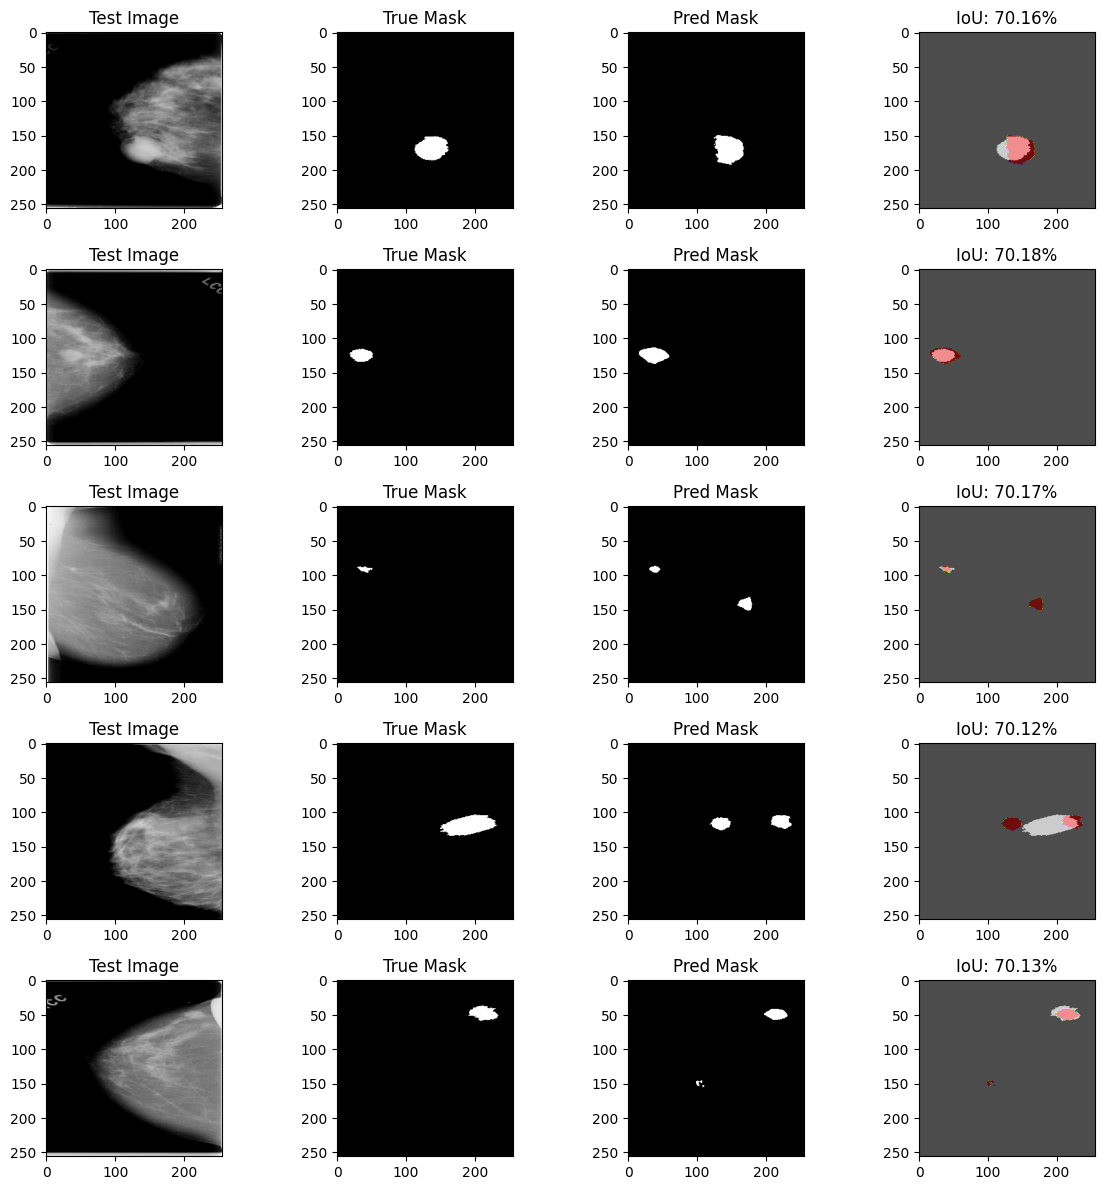

In [118]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

list_of_images = [1, 5, 30, 57,34]

# Create a 3x3 grid for plotting
fig, axs = plt.subplots(5, 4, figsize=(12, 12))

for index, i in enumerate(list_of_images):
        
    test_image = X_test[i]
    mask = y_test[i]
    test_mask = test_preds[i]       

    axs[index][0].imshow(test_image)          
    axs[index][0].set_title('Test Image')
    
    axs[index][1].imshow(mask, cmap='gray')         
    axs[index][1].set_title('True Mask')
    
    IOU_keras.update_state(test_preds[i], y_test[i])
    
    axs[index][2].imshow(test_mask, cmap='gray')        
    axs[index][2].set_title(f'Pred Mask')
    
    axs[index][3].imshow( mask, cmap='gray')
    binary_array = (test_mask > 0).astype(np.uint8)  # Convert True to 1, False to 0
    inverted_array = binary_array
    axs[index][3].imshow( np.ones_like(inverted_array)-inverted_array, alpha=0.5, cmap='Set1')
    axs[index][3].set_title(f'IoU: {round(IOU_keras.result().numpy()*100, 2)}%')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


<h3> on Val Set

In [115]:
val_preds = model.predict(X_val)
# Threshold the predictions
val_preds = post_prox(val_preds)

33/33 [==============================] - 41s 1s/step


In [116]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(val_preds, y_val)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.70144385


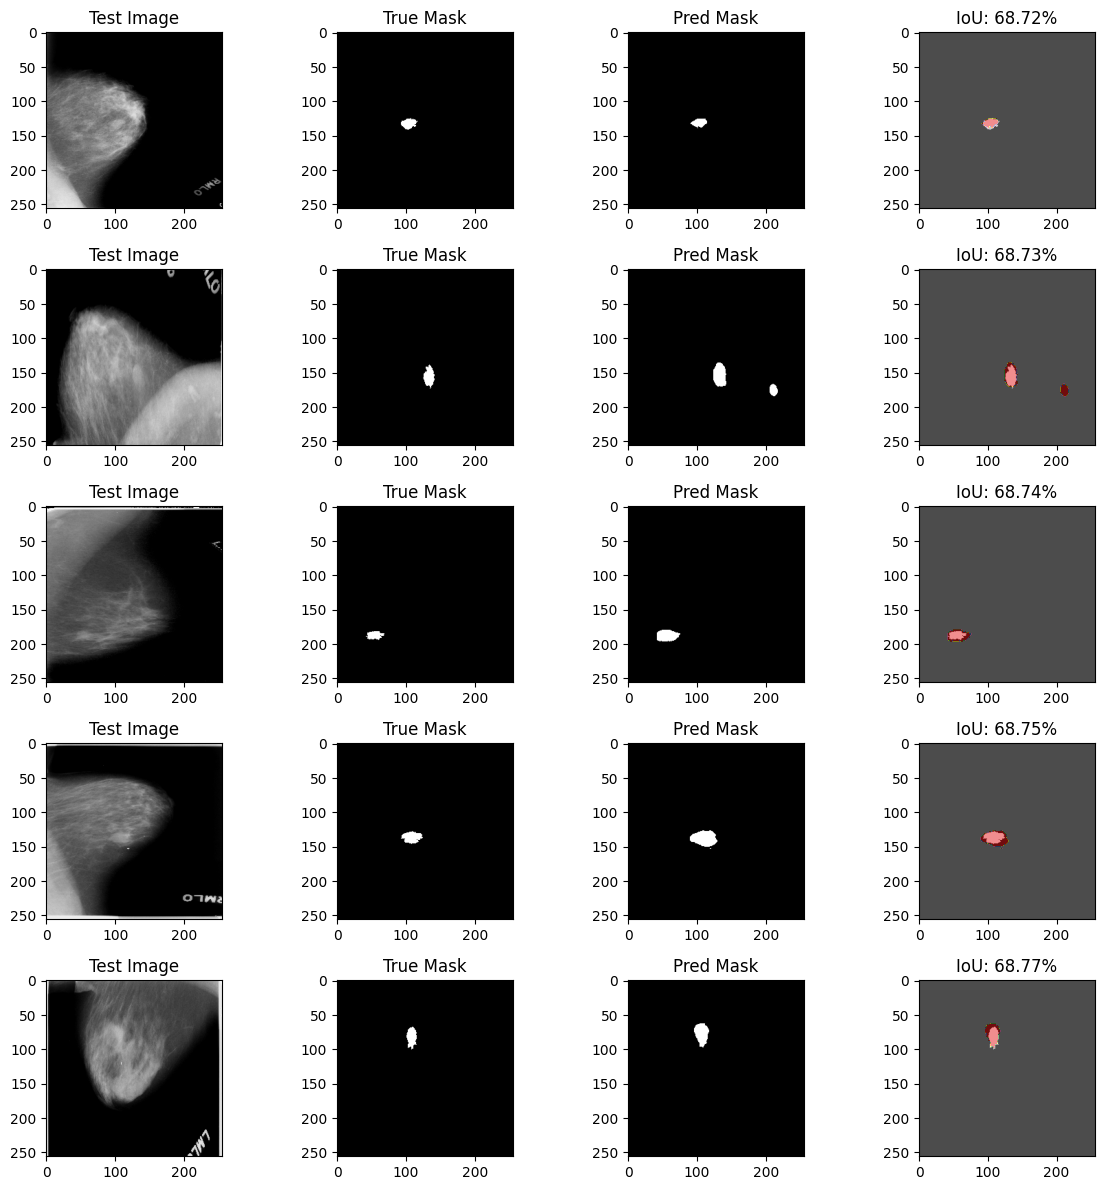

In [128]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

list_of_images = [1, 5, 30, 57,34]

# Create a 3x3 grid for plotting
fig, axs = plt.subplots(5, 4, figsize=(12, 12))

for index, i in enumerate(list_of_images):
        
    test_image = X_val[i]
    mask = y_val[i]
    test_mask = val_preds[i]       

    axs[index][0].imshow(test_image)          
    axs[index][0].set_title('Test Image')
    
    axs[index][1].imshow(mask, cmap='gray')         
    axs[index][1].set_title('True Mask')
    
    IOU_keras.update_state(mask, test_mask)
    
    axs[index][2].imshow(test_mask, cmap='gray')        
    axs[index][2].set_title(f'Pred Mask')
    
    axs[index][3].imshow( mask, cmap='gray')
    binary_array = (test_mask > 0).astype(np.uint8)  # Convert True to 1, False to 0
    inverted_array = binary_array
    axs[index][3].imshow( np.ones_like(inverted_array)-inverted_array, alpha=0.5, cmap='Set1')
    axs[index][3].set_title(f'IoU: {round(IOU_keras.result().numpy()*100, 2)}%')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

<h3> on Train Set

In [120]:
train_preds = model.predict(X_train)


132/132 [==============================] - 156s 1s/step


In [121]:
# Threshold the predictions
train_preds = post_prox(train_preds)

In [122]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(train_preds, y_train)
print("Mean IoU =", IOU_keras.result().numpy())


Mean IoU = 0.684381


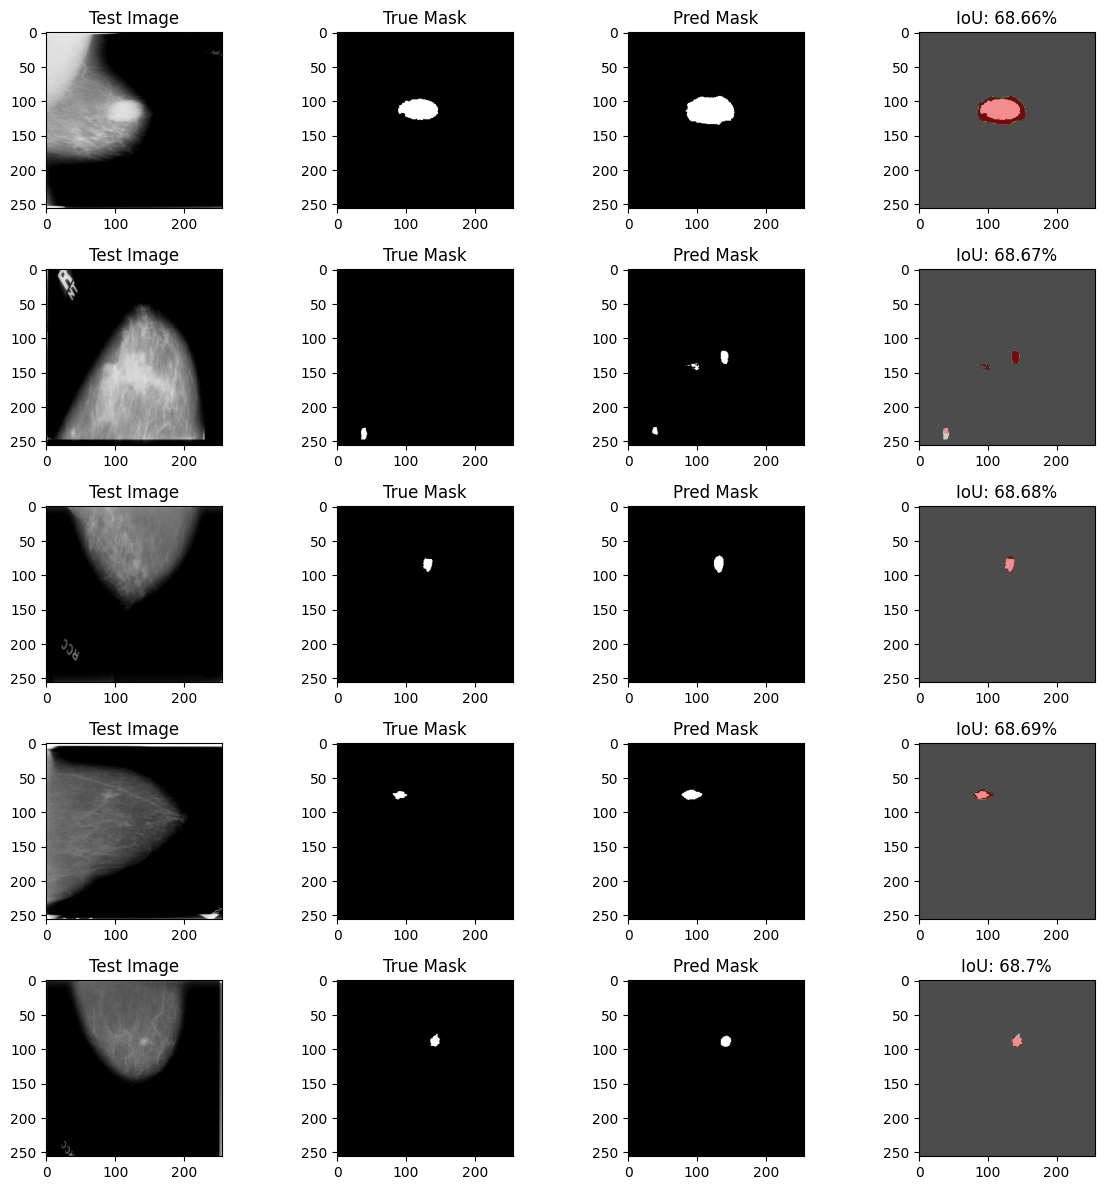

In [127]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

list_of_images =  [12, 5, 50, 56,24]

# Create a 3x3 grid for plotting
fig, axs = plt.subplots(5, 4, figsize=(12, 12))

for index, i in enumerate(list_of_images):
        
    test_image = X_train[i]
    mask = y_train[i]
    test_mask = train_preds[i]       

    axs[index][0].imshow(test_image)          
    axs[index][0].set_title('Test Image')
    
    axs[index][1].imshow(mask, cmap='gray')         
    axs[index][1].set_title('True Mask')
    
    IOU_keras.update_state(mask, test_mask)
    
    axs[index][2].imshow(test_mask, cmap='gray')        
    axs[index][2].set_title(f'Pred Mask')
    
    axs[index][3].imshow( mask, cmap='gray')
    binary_array = (test_mask > 0).astype(np.uint8)  # Convert True to 1, False to 0
    inverted_array = binary_array
    axs[index][3].imshow( np.ones_like(inverted_array)-inverted_array, alpha=0.5, cmap='Set1')
    axs[index][3].set_title(f'IoU: {round(IOU_keras.result().numpy()*100, 2)}%')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

<h1> Binary Classifier

In [30]:
a = pd.DataFrame(mass_data['pathology'].value_counts())
a =a.reset_index()
a=a.rename(columns={'index':'pathology','pathology':'counts'})

In [31]:
fig_6 =px.bar(data_frame=a, x = 'pathology', y='counts', color = 'pathology', orientation='v')
fig_6.update_layout(title_text='pathology of mass cancer', title_x=0.45)
fig_6.show()

In [32]:
bar_5 =px.pie(data_frame=a, names= 'pathology', values='counts', color = 'pathology')
bar_5.update_layout(title_text='The percentages of mass cancer', title_x=0.45)
bar_5.show()


<h2> Loading & Preprocessing

In [129]:
classification = {"MALIGNANT": 0, "BENIGN_WITHOUT_CALLBACK": 1, "BENIGN": 1} # test only 2 cases

In [143]:
IMG_HEIGHT, IMG_WIDTH = 128, 128

In [144]:
def load_image(img):
    # img  è il path dove si trova l'immagine e la leggiamo con imread
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    
    #resize cause a lot of images have different size
    c_img_size = cv2.resize(c_img, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_LINEAR)
    
    c_img_size = tf.cast(c_img_size, tf.float32) / 255.0
    return c_img_size

In [145]:
def get_pathology(pathology):
    return classification[pathology]

In [146]:
from keras.utils import to_categorical

def get_images_result(dataset):
    with ThreadPoolExecutor() as executor:
        images = np.array(list(executor.map(load_image, dataset.loc[:]['image file path'])))
        result = np.array(list(executor.map(get_pathology, dataset.loc[:]['pathology'])))
    result = to_categorical(result)
     # Return a tuple containing images and binary class matrices
    return (images, result)

In [147]:
# multiple threads reading data
mass_train_data_shuffled = mass_train_data.sample(frac = 1)
mass_test_data_shuffled = mass_test_data.sample(frac = 1)

(X_train, y_train) = get_images_result(mass_train_data_shuffled)
(X_test, y_test) = get_images_result(mass_test_data_shuffled)



print('X_train shape : {}' .format(X_train.shape))
print('y_train shape : {}' .format(y_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (1318, 128, 128, 3)
y_train shape : (1318, 2)
X_test shape : (378, 128, 128, 3)
y_test shape : (378, 2)


<h2> Display Some Images

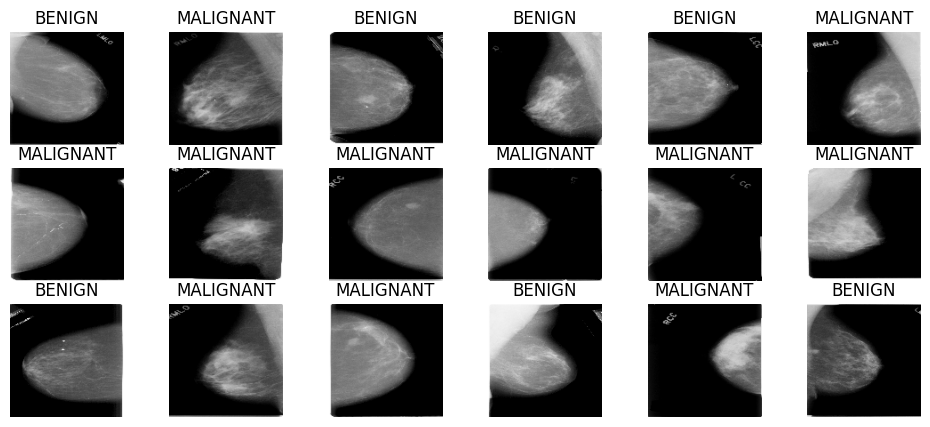

In [148]:
plt.figure(figsize=(12, 5))
for i, idx in enumerate(np.random.randint(X_train.shape[0], size=18), start=1):
    plt.subplot(3, 6, i)
    plt.imshow( X_train[idx], cmap='gray')
    if y_train[idx][0] == 0:
        plt.title('MALIGNANT')
    else: 
        plt.title('BENIGN')
    plt.axis('off')

<h2> Data Augmentation

In [149]:
def flip(image):
    return np.fliplr(image)

In [150]:
def augmented_data_flip(X_train, y_train):
    with ThreadPoolExecutor() as executor:
        images = np.array(list(executor.map(flip, X_train)))
            
     # Return a tuple containing images and binary class matrices
    return (images, y_train.copy())

X_flip, y_flip = augmented_data_flip(X_train, y_train)

In [151]:
X = np.concatenate((X_train, X_flip), axis=0)
X_train = X

y = np.concatenate((y_train, y_flip), axis=0)
y_train = y

In [152]:
print('X_train shape : {}' .format(X_train.shape))
print('y_train shape : {}' .format(y_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (2636, 128, 128, 3)
y_train shape : (2636, 2)
X_test shape : (378, 128, 128, 3)
y_test shape : (378, 2)


<h2> Train and Evalutation split

In [153]:
from sklearn.model_selection import train_test_split
# Define the split ratio (e.g., 80% train, 20% validation)
split_ratio = 0.8
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1 - split_ratio, random_state=42)

In [165]:
print('X_train shape : {}' .format(X_train.shape))
print('y_train shape : {}' .format(y_train.shape))
print('X_val shape : {}' .format(X_val.shape))
print('y_val shape : {}' .format(y_val.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (2108, 128, 128, 3)
y_train shape : (2108, 2)
X_val shape : (528, 128, 128, 3)
y_val shape : (528, 2)
X_test shape : (378, 128, 128, 3)
y_test shape : (378, 2)


# CNN MODEL

In [338]:
from keras import layers

model2 = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu', input_shape=(IMG_HEIGHT, IMG_WIDTH,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation = 'softmax')
])

#Compile the model with optimizer and metrics
model2.compile(optimizer = Adam(learning_rate = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

#Review the model summary
model2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_78 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_109 (Conv2D)         (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_79 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_110 (Conv2D)         (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_80 (MaxPooli  (None, 16, 16, 64)      

<h2> Training & Evaluation

In [339]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# ModelCheckpoint callback - save best weights
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, 
                                   verbose=1, mode='min', min_lr=1e-6)
                              
earlystopper = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode = 'min')

callbacks_list = [checkpoint, reduce_lr, earlystopper]

history2 = model2.fit(X_train, y_train, validation_data = [X_val, y_val], epochs = 50, batch_size = 64, callbacks=callbacks_list)

Epoch 1/50
42/42 [==============================] - ETA: 0s - loss: 0.7016 - accuracy: 0.5410
Epoch 1: val_loss improved from inf to 0.69224, saving model to model.h5
42/42 [==============================] - 28s 639ms/step - loss: 0.7016 - accuracy: 0.5410 - val_loss: 0.6922 - val_accuracy: 0.6019 - lr: 1.0000e-04
Epoch 2/50


C:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



42/42 [==============================] - ETA: 0s - loss: 0.6699 - accuracy: 0.5903
Epoch 2: val_loss improved from 0.69224 to 0.69108, saving model to model.h5
42/42 [==============================] - 27s 654ms/step - loss: 0.6699 - accuracy: 0.5903 - val_loss: 0.6911 - val_accuracy: 0.5853 - lr: 1.0000e-04
Epoch 3/50
42/42 [==============================] - ETA: 0s - loss: 0.6486 - accuracy: 0.6115
Epoch 3: val_loss improved from 0.69108 to 0.68886, saving model to model.h5
42/42 [==============================] - 27s 651ms/step - loss: 0.6486 - accuracy: 0.6115 - val_loss: 0.6889 - val_accuracy: 0.6682 - lr: 1.0000e-04
Epoch 4/50
42/42 [==============================] - ETA: 0s - loss: 0.6347 - accuracy: 0.6442
Epoch 4: val_loss improved from 0.68886 to 0.68536, saving model to model.h5
42/42 [==============================] - 27s 651ms/step - loss: 0.6347 - accuracy: 0.6442 - val_loss: 0.6854 - val_accuracy: 0.6469 - lr: 1.0000e-04
Epoch 5/50
42/42 [==============================] -

In [345]:
# Specify the path where you want to save the model
model2.save('saved_models/BinaryClass.hdf')

INFO:tensorflow:Assets written to: saved_models/BinaryClass.hdf\assets


INFO:tensorflow:Assets written to: saved_models/BinaryClass.hdf\assets


In [340]:
hist = history2
print(history2.history.keys())

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
t = f.suptitle('Performance in Classification Tumors', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = hist.epoch

ax1.plot(epoch_list, hist.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, hist.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epoch_list[-1], 5))
ax1.set_ylabel('Accuracy Value');ax1.set_xlabel('Epoch');ax1.set_title('Accuracy')
ax1.legend(loc="best");ax1.grid(color='gray', linestyle='-', linewidth=0.5)

ax2.plot(epoch_list, hist.history['loss'], label='Train Loss')
ax2.plot(epoch_list, hist.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epoch_list[-1], 5))
ax2.set_ylabel('Loss Value');ax2.set_xlabel('Epoch');ax2.set_title('Loss')
ax2.legend(loc="best");ax2.grid(color='gray', linestyle='-', linewidth=0.5)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


<h2> Prediction

In [141]:
# Specify the path where you want to save the model
model2 = load_model('saved_models/BinaryClass.hdf')

In [161]:
from sklearn.metrics import accuracy_score
Y_train = model2.predict(X_train)

y_pred_train = (Y_train > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred_train)

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

66/66 [==============================] - 2s 37ms/step
Accuracy: 95.59%


In [162]:
plt.figure(figsize=(12, 5))
for i, idx in enumerate(np.random.randint(X_train.shape[0], size=15), start=1):
    plt.subplot(3, 5, i)
    plt.imshow( X_train[idx], cmap='gray')
    true_label = y_train[idx]
    pred_label = y_pred_train[idx]
    plt.title(f'True Label: {true_label}\n Pred Label: {pred_label}')

    plt.axis('off')
plt.tight_layout()
plt.show()

In [163]:
from sklearn.metrics import accuracy_score
Y_val = model2.predict(X_val)

y_pred_val = (Y_val > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_val)

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

17/17 [==============================] - 1s 36ms/step
Accuracy: 96.78%


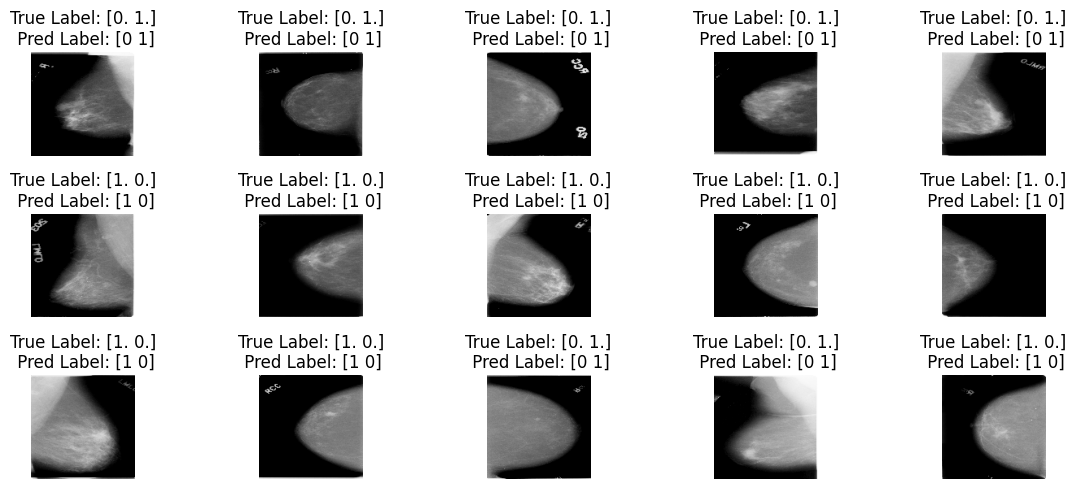

In [167]:
plt.figure(figsize=(12, 5))
for i, idx in enumerate(np.random.randint(X_val.shape[0], size=15), start=1):
    plt.subplot(3, 5, i)
    plt.imshow( X_val[idx], cmap='gray')
    true_label = y_val[idx]
    pred_label = y_pred_val[idx]
    plt.title(f'True Label: {true_label}\n Pred Label: {pred_label}')

    plt.axis('off')
plt.tight_layout()
plt.show()

In [168]:
from sklearn.metrics import accuracy_score
Y_pred = model2.predict(X_test)

y_pred_test = (Y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

12/12 [==============================] - 0s 38ms/step
Accuracy: 61.11%


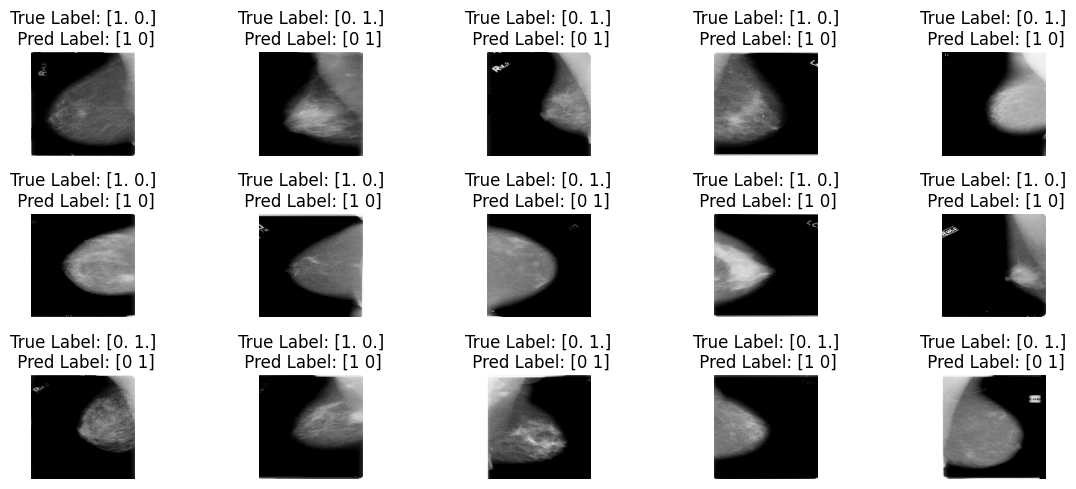

In [169]:
plt.figure(figsize=(12, 5))
for i, idx in enumerate(np.random.randint(X_test.shape[0], size=15), start=1):
    plt.subplot(3, 5, i)
    plt.imshow( X_test[idx], cmap='gray')
    true_label = y_test[idx]
    pred_label = y_pred_test[idx]
    plt.title(f'True Label: {true_label}\n Pred Label: {pred_label}')

    plt.axis('off')
plt.tight_layout()
plt.show()

<h2> Confusion Matrix

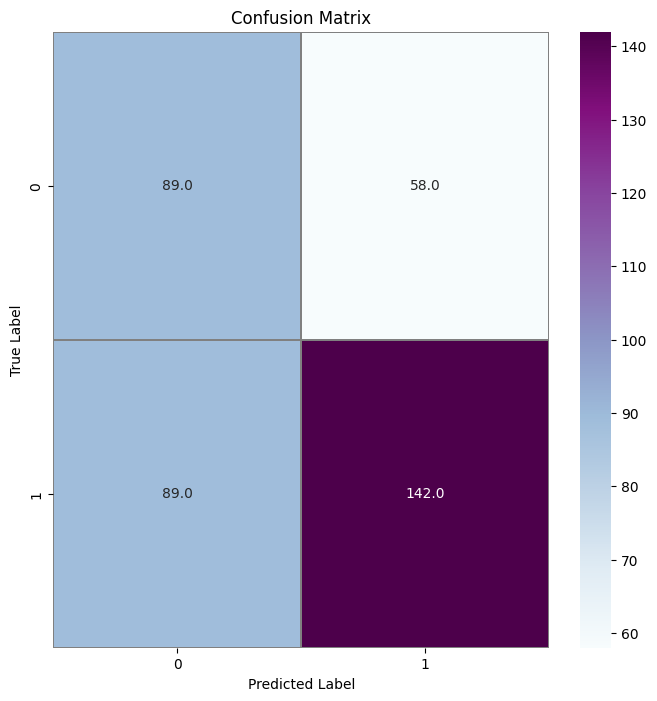

In [171]:
from sklearn.metrics import confusion_matrix

Y_pred_classes = np.argmax(y_pred_test,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()